In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
#Load dataset
df_gym = pd.read_csv('gym_members_exercise_tracking.csv')
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [19]:
# Check for missing values
missing_values = df_gym.isnull().sum()

In [20]:
print(missing_values)

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [21]:
# Drop rows with missing target values, if any
data = df_gym.dropna(subset=['Experience_Level'])

In [22]:
# Encode categorical variables (Gender, Workout_Type)
label_encoders = {}
categorical_columns = ['Gender', 'Workout_Type']

for col in categorical_columns:
    le = LabelEncoder()
    df_gym[col] = le.fit_transform(df_gym[col])
    label_encoders[col] = le

In [23]:
df_gym.head

<bound method NDFrame.head of      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1         88.3        1.71      180      157           60   
1     46       0         74.9        1.53      179      151           66   
2     32       0         68.1        1.66      167      122           54   
3     25       1         53.2        1.70      190      164           56   
4     38       1         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       1         87.1        1.74      187      158           67   
969   25       1         66.6        1.61      184      166           56   
970   59       0         60.4        1.76      194      120           53   
971   32       1        126.4        1.83      198      146           62   
972   46       1         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Workout_T

In [24]:
# Define features (X) and target (y)
X = df_gym.drop(columns=['Experience_Level'])
y = df_gym['Experience_Level']

In [25]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
#######################################################################
#create training and testing datasets. 30% for tests selected by random
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42,stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(681, 14) (681,)
(292, 14) (292,)


In [27]:
# Train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# neigh = KNeighborsClassifier(n_neighbors=5,weights='distance')
# neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [28]:
# Predictions on training and testing sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [29]:
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy  = accuracy_score(y_test, y_test_pred)

In [30]:
# Generate confusion matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Display results
# uuu
results = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy,
    "Train Confusion Matrix": train_conf_matrix,
    "Test Confusion Matrix": test_conf_matrix
}
results

{'Train Accuracy': 0.8663729809104258,
 'Test Accuracy': 0.8561643835616438,
 'Train Confusion Matrix': array([[215,  48,   0],
        [ 43, 241,   0],
        [  0,   0, 134]]),
 'Test Confusion Matrix': array([[ 93,  20,   0],
        [ 22, 100,   0],
        [  0,   0,  57]])}

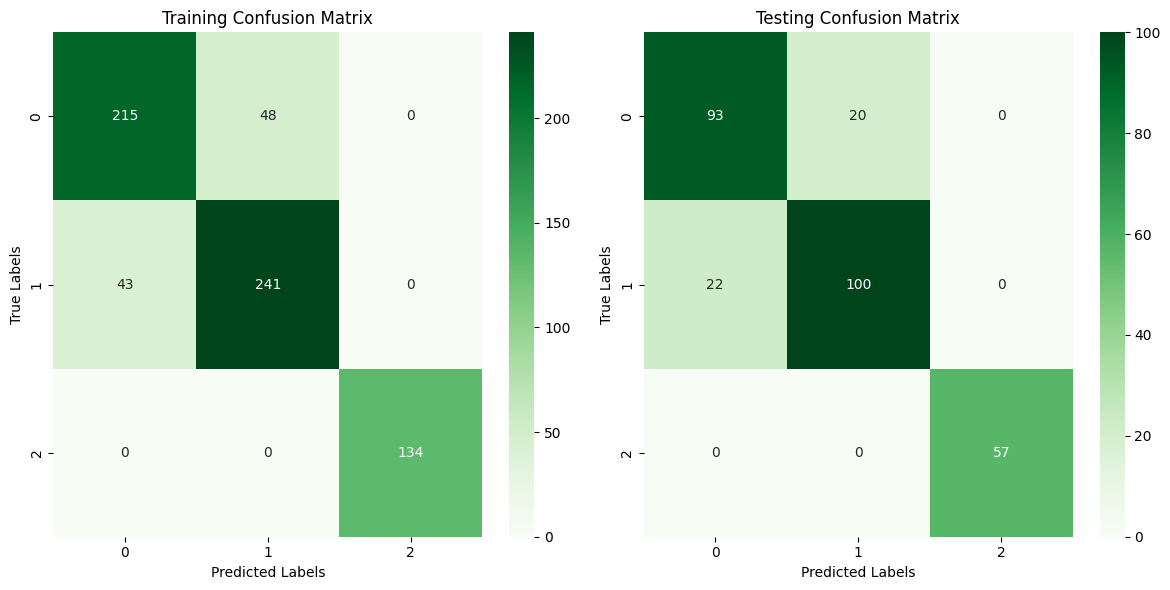

In [32]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training confusion matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('Training Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Testing confusion matrix
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Testing Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

Para determinar se o modelo está sofrendo de overfitting, podemos comparar a acurácia no conjunto de treinamento com a acurácia no conjunto de teste. Em geral:

Overfitting ocorre quando o modelo tem um desempenho significativamente melhor no treinamento do que no teste, indicando que ele está memorizando os dados de treinamento em vez de generalizar bem para novos dados.
Boa generalização ocorre quando a diferença entre as acurácias de treinamento e teste é pequena.
Resultados:
Acurácia no treinamento: 90.75%
Acurácia no teste: 81.51%
Diferença: 9.24 pontos percentuais
Análise:
Diferença de acurácia:

A diferença de ~9.24% entre o treinamento e o teste indica que o modelo está capturando bem os padrões dos dados, mas ainda tem algum grau de especialização no conjunto de treinamento.
Natureza do modelo KNN:

O KNN tende a ser mais resiliente ao overfitting, mas ele pode ser influenciado pela escolha de hiperparâmetros, como o número de vizinhos (n_neighbors).
Conclusão:
Este modelo apresenta uma leve tendência ao overfitting, mas ainda está dentro de uma margem aceitável. Para mitigar isso:

Testar valores diferentes para n_neighbors, ajustando para um melhor equilíbrio entre bias e variance.
Validar com mais métricas, como F1-score, especialmente se as classes estiverem desbalanceadas.
Considerar validação cruzada para avaliar o desempenho médio em diferentes divisões do conjunto de dados.